# Simple classification

## Import packages

In [31]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import math
import random
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation,Flatten
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## Get def from mp1 

In [2]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(400, 20, True)
    return [X_test, Y_test]

## Generate a training set of images of simple geometric shapes 

In [3]:
[X_train, Y_train] = generate_dataset_classification(400, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

In [4]:
y_train = to_categorical(Y_train)

## Build and train a linear classiﬁer 

In [5]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))

## Stochastic gradient descent optimizer

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
400/400 [==============================] - 0s 283us/step - loss: 7.9151 - acc: 0.3300
Epoch 2/30
400/400 [==============================] - 0s 112us/step - loss: 7.5046 - acc: 0.4225
Epoch 3/30
400/400 [==============================] - 0s 95us/step - loss: 6.3447 - acc: 0.5475
Epoch 4/30
400/400 [==============================] - 0s 95us/step - loss: 6.7594 - acc: 0.4425
Epoch 5/30
400/400 [==============================] - 0s 97us/step - loss: 6.4871 - acc: 0.5300
Epoch 6/30
400/400 [==============================] - 0s 102us/step - loss: 5.9864 - acc: 0.6100
Epoch 7/30
400/400 [==============================] - 0s 106us/step - loss: 5.9413 - acc: 0.6300
Epoch 8/30
400/400 [==============================] - 0s 100us/step - loss: 5.9431 - acc: 0.6275
Epoch 9/30
400/400 [==============================] - 0s 111us/step - loss: 5.9428 - acc: 0.6275
Epoch 10/30
400/400 [==============================] - 0s 100us/step - loss: 5.9391 - acc: 0.6275
Epoch 11/30
400/400 [===========

The final values of loss function are high and accuracy rates are low, so the results are not good.

## Check  classifier 

In [8]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [9]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [10]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

# Visualization of the Solution 

##  Get weights

In [11]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

## Visualization 

### Rectangle  

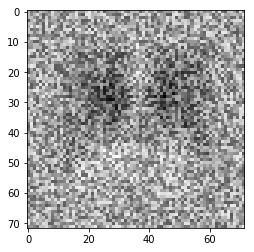

In [12]:
plt.imshow(w10.reshape(72,72), cmap='gray')

### Disk 

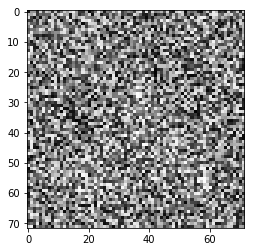

In [13]:
plt.imshow(w11.reshape(72,72), cmap='gray')

### Triangle 

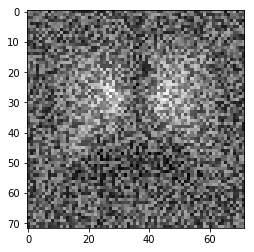

In [14]:
plt.imshow(w12.reshape(72,72), cmap='gray')

The results of stochastic gradient descent optimizer are not good enough,then I try to use Adam optimizer.

## Adam optimizer

In [15]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
400/400 [==============================] - 0s 327us/step - loss: 1.5576 - acc: 0.4850
Epoch 2/30
400/400 [==============================] - 0s 117us/step - loss: 0.7406 - acc: 0.6700
Epoch 3/30
400/400 [==============================] - 0s 97us/step - loss: 0.4651 - acc: 0.8075
Epoch 4/30
400/400 [==============================] - 0s 176us/step - loss: 0.3501 - acc: 0.8525
Epoch 5/30
400/400 [==============================] - 0s 101us/step - loss: 0.2735 - acc: 0.9250
Epoch 6/30
400/400 [==============================] - 0s 117us/step - loss: 0.2190 - acc: 0.9700
Epoch 7/30
400/400 [==============================] - 0s 102us/step - loss: 0.1982 - acc: 0.9725
Epoch 8/30
400/400 [==============================] - 0s 98us/step - loss: 0.1633 - acc: 0.9850
Epoch 9/30
400/400 [==============================] - 0s 110us/step - loss: 0.1465 - acc: 0.9875
Epoch 10/30
400/400 [==============================] - 0s 92us/step - loss: 0.1556 - acc: 0.9725
Epoch 11/30
400/400 [===========

## Check classifier

In [18]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [19]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [20]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

# Visualization of the Solution

## Get weights

In [21]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

### Rectangle 

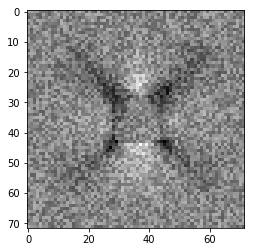

In [22]:
plt.imshow(w10.reshape(72,72), cmap='gray')

### Disk  

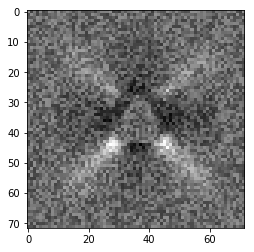

In [23]:
plt.imshow(w11.reshape(72,72), cmap='gray')

### Triangle 

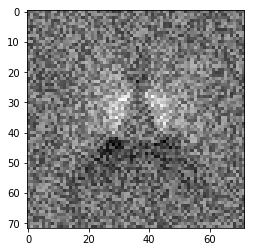

In [24]:
plt.imshow(w12.reshape(72,72), cmap='gray')

We can see that the reults of adam optimizer are much better than sgd

# A More Difficult Classification Problem

## Generate new training and testing set

In [25]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

In [26]:
X_train = X_train.reshape(len(X_train), 72, 72, 1)
X_test = X_test.reshape(len(X_test), 72, 72, 1)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

## Build and Compile the model

In [27]:
model = Sequential()
model.add(Conv2D(kernel_size=(5, 5), padding="same",input_shape=(72, 72, 1),filters=16, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [28]:
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [32]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model

In [34]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Train on 300 samples, validate on 400 samples
Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 1.2560 - acc: 0.4000 - val_loss: 1.1228 - val_acc: 0.3275
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 1.0324 - acc: 0.5167 - val_loss: 1.0139 - val_acc: 0.5575
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.8149 - acc: 0.6600 - val_loss: 0.7958 - val_acc: 0.6600
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.6693 - acc: 0.7033 - val_loss: 0.8505 - val_acc: 0.6275
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.5650 - acc: 0.7667 - val_loss: 0.6773 - val_acc: 0.7025
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.4112 - acc: 0.8533 - val_loss: 0.6127 - val_acc: 0.7525
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2736 - acc: 0.9033 - val_loss: 0.6208 - val_acc: 0.8025
Epoch 8/10
300/300 [===

At last, we get a good results with loss function 0.1010, and accuracy 0.9633

## Evaluate the model 

In [35]:
model.evaluate(X_test, y_test)

400/400 [==============================] - 1s 2ms/step


[0.538607656955719, 0.8225]

We can see that the results on test dataset we get an loss function about 0.5386,and accuracy is 0.8225

# Regression Problem

## Get def from mp1

In [38]:

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y, z):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    xy = z.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    print(y, ':', z)
    plt.show()
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

## Generate a training and testing set

In [39]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [40]:
nb_train = len(X_train)
nb_test = len(X_test)
y_train = np.zeros([nb_train, 6])
y_test = np.zeros([nb_test, 6])
for i in range(nb_train):
    y_train[i] = normal_triangle(Y_train[i])
for i in range(nb_test):
    y_test[i] = normal_triangle(Y_test[i])
    
x_train = X_train.reshape(len(X_train), 72, 72, 1)
x_test = X_test.reshape(len(X_test), 72, 72, 1)

## Build and Compile the model

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, activation="relu", input_shape=(72, 72, 1), kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Fit the model

In [42]:
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/6
300/300 [==============================] - 4s 12ms/step - loss: 0.1454 - acc: 0.3333 - val_loss: 0.0658 - val_acc: 0.4100
Epoch 2/6
300/300 [==============================] - 3s 9ms/step - loss: 0.0562 - acc: 0.4833 - val_loss: 0.0498 - val_acc: 0.5867
Epoch 3/6
300/300 [==============================] - 3s 9ms/step - loss: 0.0389 - acc: 0.6133 - val_loss: 0.0422 - val_acc: 0.5500
Epoch 4/6
300/300 [==============================] - 3s 10ms/step - loss: 0.0324 - acc: 0.6333 - val_loss: 0.0386 - val_acc: 0.6000
Epoch 5/6
300/300 [==============================] - 3s 9ms/step - loss: 0.0250 - acc: 0.6767 - val_loss: 0.0379 - val_acc: 0.6133
Epoch 6/6
300/300 [==============================] - 3s 9ms/step - loss: 0.0195 - acc: 0.7000 - val_loss: 0.0373 - val_acc: 0.6000


Performance is not that good, with accuracy 0.7000, which can be seen from the plot. I randomly choose 20 plots to visualize the result.

# Randomly select some of the sets for visulation

In [43]:
import random
Y_pred = model.predict(x_test, batch_size=32)
list = range(300) 
slice = random.sample(list, 20)

[0.10725775 0.43791285 0.3575454  0.6254512  0.90015316 0.570782  ] : [0.02587458 0.40829003 0.88692402 0.5750937  0.19607788 0.64991061]


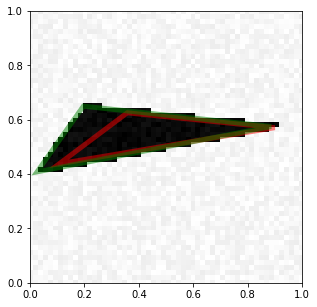

[0.4649374  0.56560373 0.41936672 0.6298604  0.46250886 0.73012   ] : [0.49350036 0.81401674 0.17839825 0.77686033 0.51306942 0.78858177]


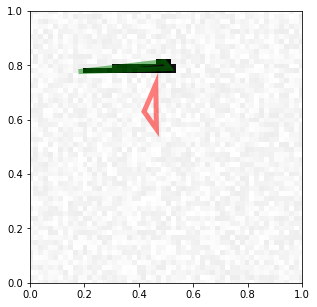

[0.5902181  0.11594122 0.10580159 0.934768   0.80985385 0.8496498 ] : [0.05339089 0.71974615 0.56872916 0.92463085 0.80989643 0.17126582]


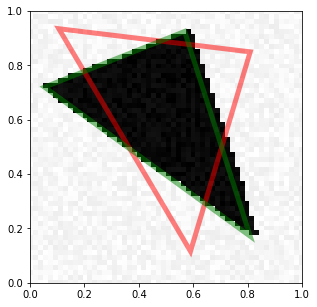

[ 0.28184777 -0.01775422  0.61128694  0.03691474  0.5381073   0.45115688] : [0.19442549 0.3877962  0.81969062 0.03490978 0.04171056 0.0962916 ]


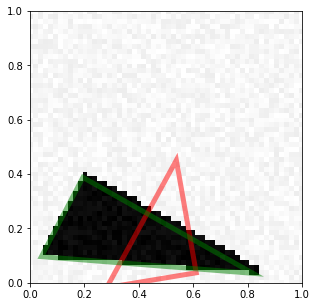

[0.41728812 0.48501974 0.2836693  0.8496713  0.60477114 0.7755824 ] : [0.74420711 0.56207858 0.01531494 0.90773364 0.06312641 0.75852919]


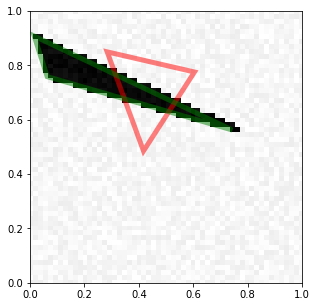

[0.4169798  0.44092074 0.5594396  0.7344231  0.8788935  0.9878133 ] : [0.45085399 0.31679428 0.13485008 0.86297745 0.98635648 0.78294372]


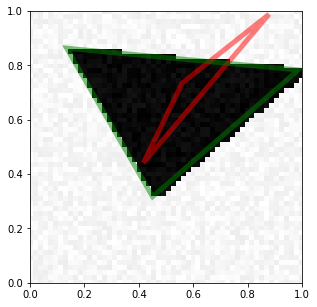

[0.35595387 0.0600517  0.47334012 0.32735384 0.42982426 0.52967674] : [0.25556385 0.02639989 0.43054887 0.40703536 0.43363711 0.48115854]


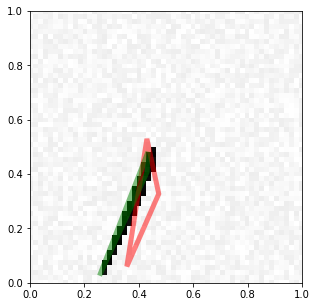

[0.10451366 0.23375472 0.30222884 0.6005782  0.8705492  0.6291074 ] : [0.00812088 0.40688693 0.75314493 0.15268472 0.60297669 0.96830006]


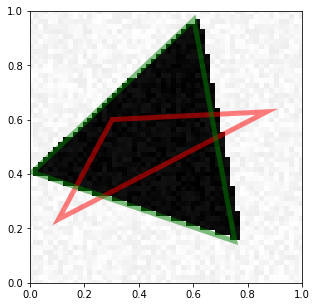

[0.13144659 0.38115928 0.22522804 0.6232778  0.29127532 0.87601006] : [0.07784976 0.30459878 0.37801504 0.99641385 0.3397865  0.68161631]


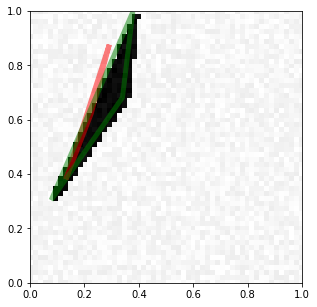

[0.17846434 0.46694952 0.44418168 0.6909826  1.165491   0.82306445] : [0.99421371 0.81918937 0.49385394 0.74219535 0.12676785 0.37716275]


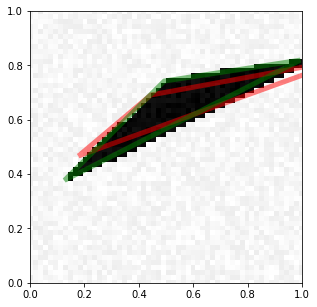

[0.80438673 0.29229566 0.8171793  0.62389326 0.92713726 0.6329499 ] : [0.820765   0.81705088 0.84746283 0.33181924 0.73583445 0.20711573]


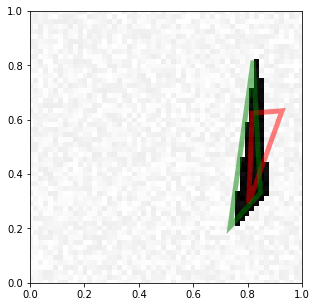

[0.34622812 0.05239269 0.58052474 0.34440008 0.6779469  0.7461846 ] : [0.55590423 0.98402247 0.71622493 0.09396233 0.2924955  0.1067477 ]


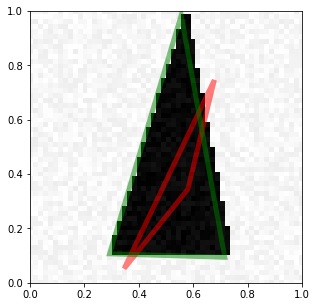

[-0.02110611  0.40595138  0.23009051  0.7210181   1.1167061   0.90030503] : [0.08215048 0.32785182 0.12284347 0.67032916 0.98795196 0.90747714]


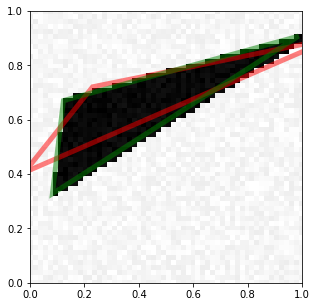

[0.31061777 0.40325993 0.52507323 0.45882902 0.7434164  0.52405363] : [0.16501296 0.56750216 0.58698264 0.42550662 0.86839831 0.4134927 ]


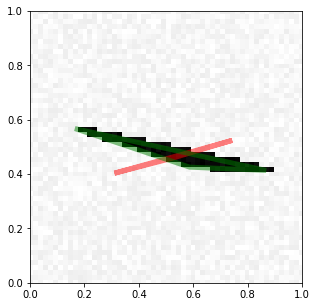

[ 0.15409254 -0.00235462  0.19940801  0.44008294  0.3610213   0.614497  ] : [0.31884787 0.01715176 0.50680953 0.43778805 0.00343699 0.67586971]


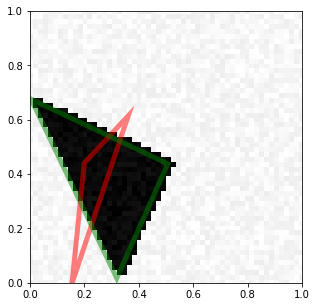

[0.44300252 0.360045   0.80421615 0.13432978 0.90431106 0.32600418] : [0.320515   0.54872686 0.99607403 0.03308111 0.92462534 0.3524559 ]


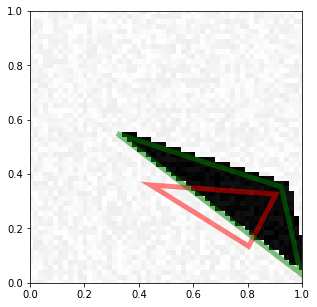

[0.4710942  0.4415241  0.47906893 0.7142293  0.90306866 0.6920463 ] : [0.91036089 0.66999856 0.31177972 0.43781309 0.1999098  0.68776698]


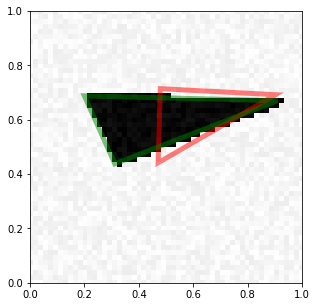

[0.59050786 0.54069644 0.56271267 0.7673469  0.8222585  0.80207175] : [0.91721893 0.52539508 0.45030205 0.48102976 0.41434519 0.97976715]


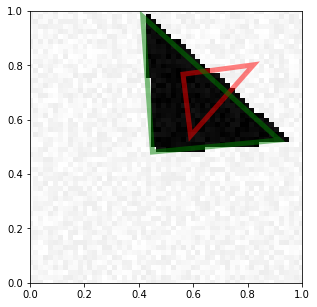

[0.4479153  0.22656265 0.29700562 0.6785038  0.39864656 0.7312498 ] : [0.68785981 0.2724499  0.0682568  0.48609497 0.05624389 0.93781202]


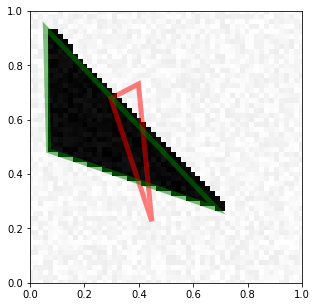

[0.3724593  0.15968314 0.5590797  0.3089762  0.8336805  0.24976492] : [0.9365732  0.18957734 0.1829624  0.25914086 0.40098777 0.25316848]


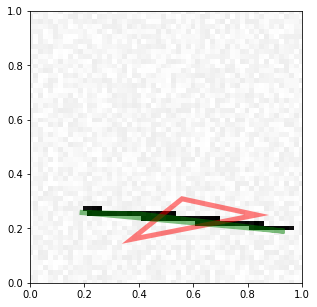

In [44]:
for i in slice:
     visualize_prediction(X_test[i], Y_pred[i], Y_test[i])

# Image Denoising

## Modifie def generate_a_* function

In [47]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

# Make some changes to remove the noise

def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im1, im2 = generate_a_rectangle()
    im_size = im1.shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        noise=np.random.randint(100)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk(noise, free_location)
        else:
            [X[i], Y[i]] = generate_a_triangle(noise, free_location)
    X = X / 255.0
    Y = Y / 255.0
    return [X, Y]

def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, True)
    return [X_test, Y_test]

In [48]:
[X_train_noise, X_train_clean] = generate_dataset_denoising(300, True)
[X_test_noise, X_test_clean] = generate_test_set_denoising()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [49]:
x_train_clean = X_train_clean.reshape(len(X_train_clean), 72, 72, 1)
x_train_noise = X_train_noise.reshape(len(X_train_noise), 72, 72, 1)
x_test_clean = X_test_clean.reshape(len(X_test_clean), 72, 72, 1)
x_test_noise = X_test_noise.reshape(len(X_test_noise), 72, 72, 1)
input_img = Input(shape=(72, 72, 1))

## Build and Compile the model 

In [50]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [51]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [52]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model

In [53]:
autoencoder.fit(x_train_noise, x_train_clean, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_noise, x_test_clean))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 6s 21ms/step - loss: 0.5148 - acc: 0.8174 - val_loss: 0.2205 - val_acc: 0.9156
Epoch 2/10
300/300 [==============================] - 6s 20ms/step - loss: 0.2159 - acc: 0.9137 - val_loss: 0.1450 - val_acc: 0.9574
Epoch 3/10
300/300 [==============================] - 6s 19ms/step - loss: 0.1043 - acc: 0.9668 - val_loss: 0.0482 - val_acc: 0.9871
Epoch 4/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0362 - acc: 0.9887 - val_loss: 0.0287 - val_acc: 0.9902
Epoch 5/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0252 - acc: 0.9914 - val_loss: 0.0266 - val_acc: 0.9910
Epoch 6/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0221 - acc: 0.9925 - val_loss: 0.0242 - val_acc: 0.9916
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0207 - acc: 0.9927 - val_loss: 0.0211 - val_acc: 0.9924
Epoch 8/10
300/300 [===

We can see that result is really good with loss quite little 0.0161, accuracy is 0.9942

In [54]:
x_pred_clean = autoencoder.predict(x_test_noise, batch_size=32)

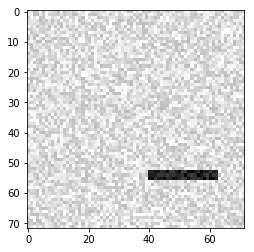

In [55]:
plt.imshow(x_test_noise[0].reshape(72,72), cmap='gray')

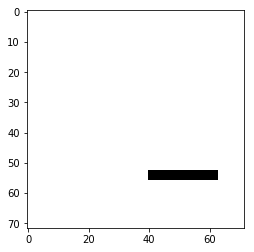

In [56]:
plt.imshow(x_test_clean[0].reshape(72,72), cmap='gray')

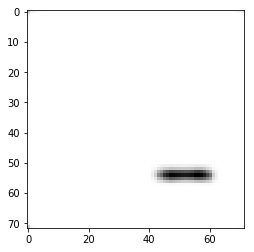

In [57]:
plt.imshow(x_pred_clean[0].reshape(72,72), cmap='gray')

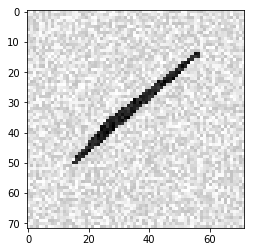

In [58]:
plt.imshow(x_test_noise[30].reshape(72,72), cmap='gray')

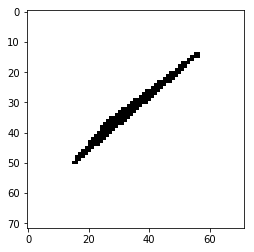

In [59]:
plt.imshow(x_test_clean[30].reshape(72,72), cmap='gray')

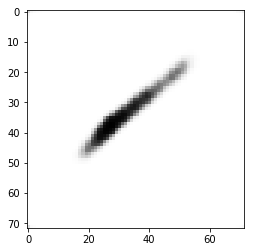

In [60]:
plt.imshow(x_pred_clean[30].reshape(72,72), cmap='gray')

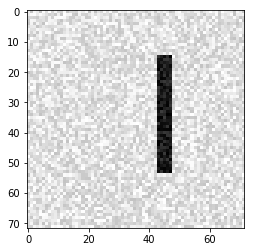

In [61]:
plt.imshow(x_test_noise[60].reshape(72,72), cmap='gray')

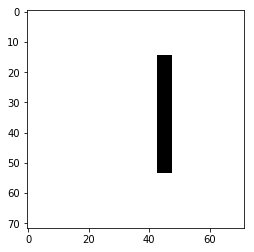

In [62]:
plt.imshow(x_test_clean[60].reshape(72,72), cmap='gray')

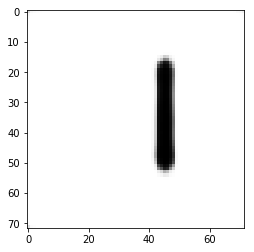

In [63]:
plt.imshow(x_pred_clean[60].reshape(72,72), cmap='gray')

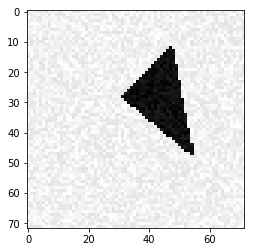

In [64]:
plt.imshow(x_test_noise[170].reshape(72,72), cmap='gray')

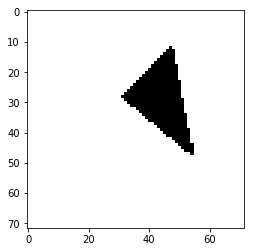

In [65]:
plt.imshow(x_test_clean[170].reshape(72,72), cmap='gray')

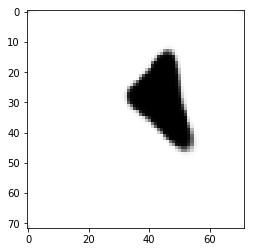

In [66]:
plt.imshow(x_pred_clean[170].reshape(72,72), cmap='gray')

I visulized the original,denoised and predicted plots.The results in original,denoised are similar. But we can get a better result with denoised prediction.